In [1]:
from nanopyx.core.transform.interpolation import catmull_rom
from nanopyx.core.analysis.registration import Registration

import numpy as np
from matplotlib import pyplot as plt

from skimage.draw import rectangle 

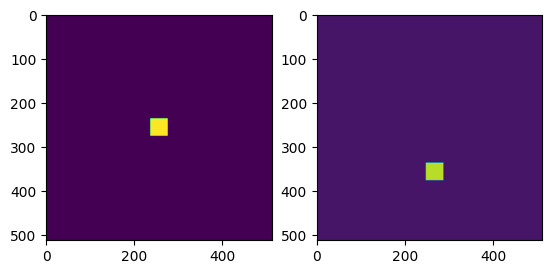

In [5]:
image = np.zeros((512, 512), dtype=np.float32)
rr, cc = rectangle((256-20, 256-20), extent=(40,40), shape=image.shape)
image[rr,cc] = 10

image_2 = catmull_rom.Interpolator(image).shift(10,100)

fig, axs = plt.subplots(1, 2)
axs[0].imshow(image)
axs[1].imshow(image_2)
plt.show()

In [6]:
Reg = Registration(image_2, image)
image_fixed = Reg.register(translation=True, rotation=False, scaling=False)

Looking for pure translation...


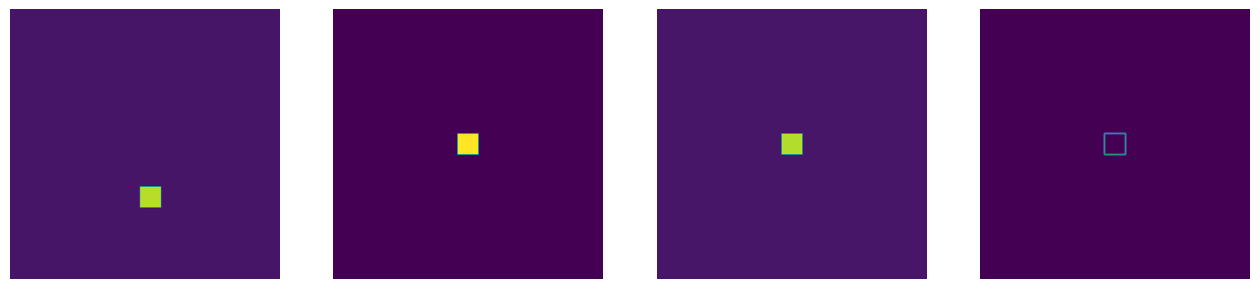

In [7]:
plt.close('all')
fig, axs = plt.subplots(1,4, figsize=(16,9))
axs[0].imshow(image_2)
axs[0].axis('off')

axs[1].imshow(image)
axs[1].axis('off')

axs[2].imshow(image_fixed)
axs[2].axis('off')

axs[3].imshow(np.sqrt((image-image_fixed)**2))
axs[3].axis('off')

plt.show()